In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case2_rk4 import rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth, rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 31
n_successful_steps 31

integration complete


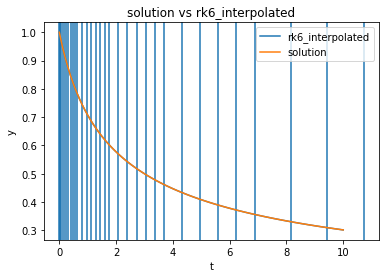

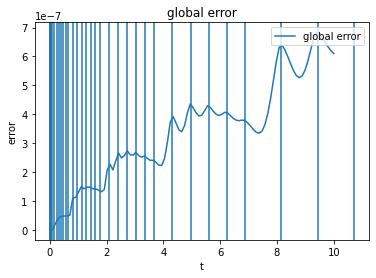

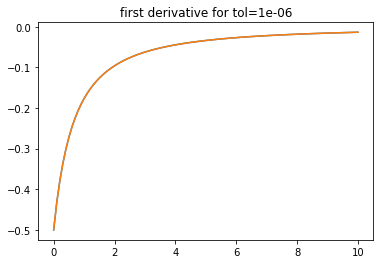

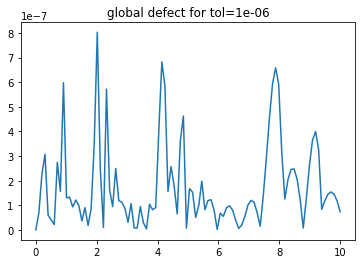

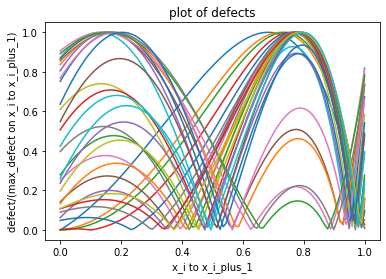

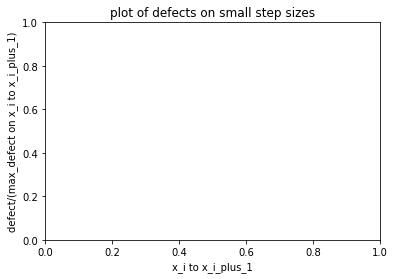

0.0
0.0
1.1539658117953877e-12
3.524858183112656e-11
9.695310110302557e-10
2.3173445495849876e-08
3.621032840239735e-08
4.364680605828397e-08
4.7603399111473266e-08
4.937396758109003e-08
4.976524237143565e-08
4.928925256830752e-08
1.1063936011801445e-07
1.3884447580547743e-07
1.498484166750913e-07
1.5177349532713436e-07
1.4891779442915976e-07
1.4362074018947624e-07
1.371797861970947e-07
2.3488998945886408e-07
2.692392386816067e-07
2.7491301002324775e-07
2.675619554248776e-07
2.5457404478901324e-07
2.3953306205193314e-07
3.9545277974450954e-07
4.3511177943988955e-07
4.2948115031027356e-07
4.066304901684248e-07
3.7824953247334037e-07
6.413011650052702e-07
6.834766976271389e-07
6.539464123545002e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 2.0000000000000013, 0.49999999999999967, 1.0000000000000007, 1.9999999999999987, 1.0000000000000029, 0.9999999999999987, 0.5000000000000007, 0.9999999999999972]
n_steps 92
n_successful_steps 77

integration complete


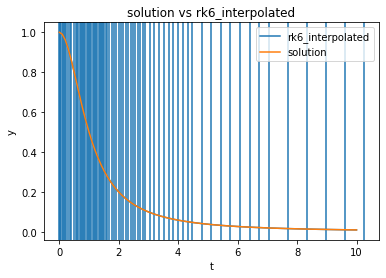

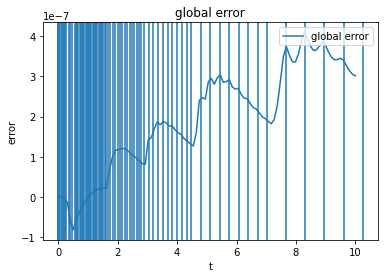

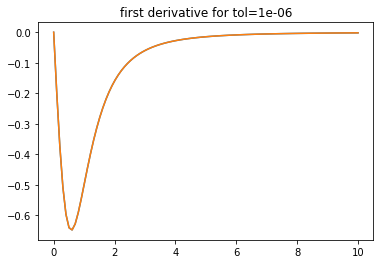

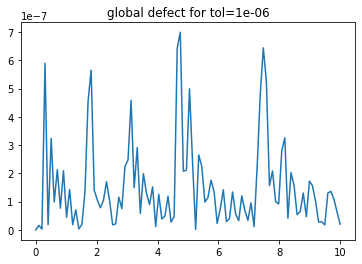

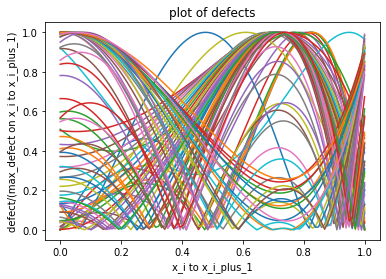

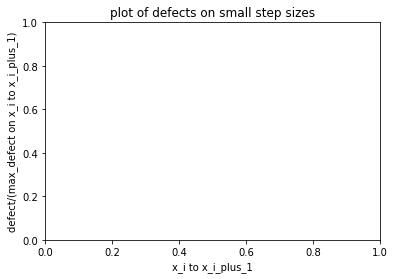

0.0
0.0
1.0025313912365164e-13
6.551870157522899e-12
4.2871217686979435e-10
1.1300093083477236e-09
2.0865914551748688e-09
3.2499354318815676e-09
4.544393306105121e-09
5.869229435795376e-09
5.955749649011466e-08
5.758649546105943e-08
7.732828433137939e-08
5.985892315152341e-08
5.447118800461226e-08
4.8783661221740715e-08
4.289933330792195e-08
3.692692784884599e-08
3.097369638549452e-08
2.5139432424658992e-08
1.951205486072638e-08
1.4164828310292421e-08
9.155092572932233e-09
4.524240870829033e-09
2.9864277717450705e-10
3.508793755546691e-09
6.896697712921451e-09
9.87316617351297e-09
1.2453720665828172e-08
1.4659402192140902e-08
1.6515074696688004e-08
1.8047971228618565e-08
1.928649184801401e-08
2.025924167314841e-08
2.0994289084974582e-08
2.1518617776550286e-08
2.185774128360407e-08
2.20354537949774e-08
2.207368848816671e-08
2.1992461129993757e-08
6.034048499747868e-08
8.699578646353956e-08
1.0471266820299974e-07
1.1567556038039051e-07
1.2159691636925984e-07
1.2380624431207465e-07
1.2332

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.0000000000000029, 0.4999999999999986, 0.9999999999999972]
n_steps 39
n_successful_steps 34

integration complete


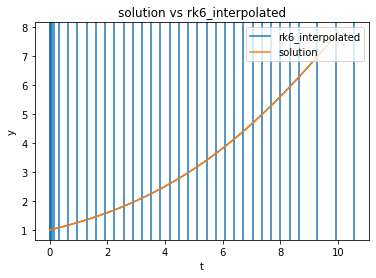

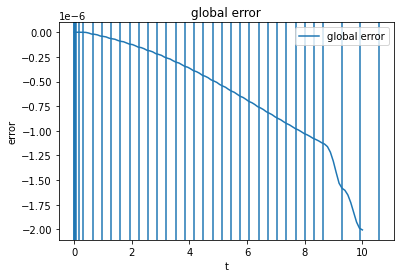

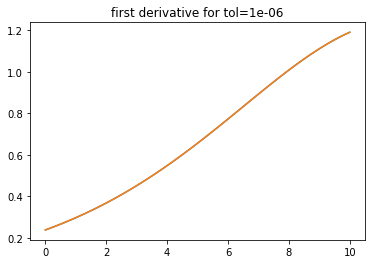

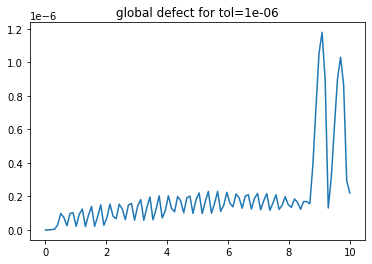

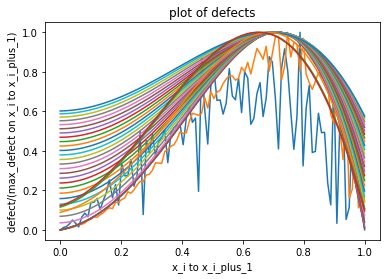

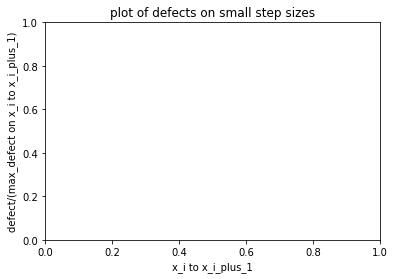

0.0
0.0
4.440892098500626e-16
1.8207657603852567e-14
5.88640247656258e-13
1.893951662168547e-11
6.127987006721014e-10
2.0027111302667322e-08
4.165856903881604e-08
6.56047689506778e-08
9.195053540800302e-08
1.2076489852574923e-07
1.5209796311310697e-07
1.859777429835674e-07
2.224070507761411e-07
2.6136055275571834e-07
3.02782110495059e-07
3.465825364479258e-07
3.92637892421277e-07
4.4078846483941447e-07
4.90838513389491e-07
5.425568931904934e-07
5.956785873451054e-07
6.499071676380197e-07
7.049181278695471e-07
7.603630010066809e-07
8.158741024999472e-07
8.710697176894655e-07
9.255595054824539e-07
9.78949922014749e-07
1.0308494244881672e-06
1.0808733472700283e-06
1.1286483179162587e-06
1.581200707256869e-06
1.993220113405414e-06
2.3637357244865598e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5000000000000007, 1.0, 2.0000000000000004, 3.999999999999999, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5, 8.000000000000004, 2.0, 1.000000000000011, 1.0000000000000444, 1.9999999999996447, 1.0000000000003553, 2.0000000000007105, 15.999999999999986, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 4081
n_successful_steps 3918

integration complete


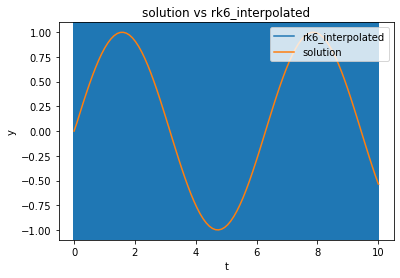

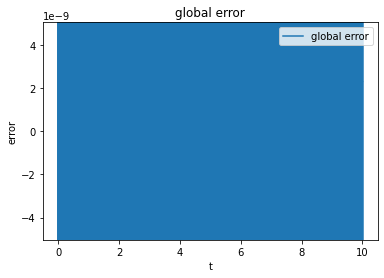

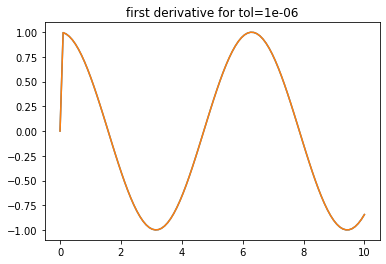

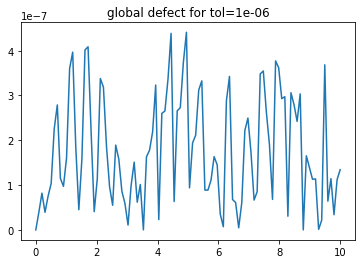

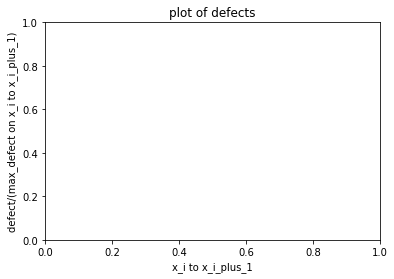

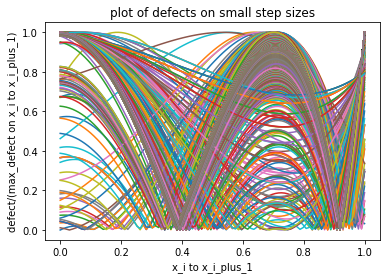

0.0
0.0
2.8928275573603113e-11
5.4350370558287064e-11
7.658491982948101e-11
9.592481062942193e-11
1.1263914627412941e-10
7.695901502874358e-10
1.2705339254640013e-09
1.6430579414389301e-09
1.9104204294906335e-09
2.092186885543912e-09
2.2047767622018766e-09
2.2619326568024123e-09
2.2751226944062175e-09
2.2538852919445906e-09
2.2061243248883144e-09
2.1383615468606454e-09
2.0559522695418053e-09
1.963269432442294e-09
1.863860534662143e-09
1.7605812641097174e-09
1.6557090073976433e-09
1.5510394704709718e-09
1.4479682904078306e-09
1.3475603515000767e-09
1.2506082107399674e-09
1.1576813882530068e-09
1.0691678722918319e-09
9.853088692168832e-10
1.917007268203985e-09
2.377767156780397e-09
2.5297798994516896e-09
2.486526734513106e-09
2.3263921830607437e-09
2.1026380497835007e-09
1.8506824406294697e-09
1.5933876232332445e-09
1.3448817198780105e-09
2.7549395265058507e-09
1.9358299407912227e-09
3.5920014185286675e-10
1.3161160633545776e-09
2.832356169046868e-09
2.2800604321249196e-09
1.854731160322

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.9999999999999997, 1.0, 0.9999999999999987, 1.0000000000000002, 1.0000000000000007, 0.5000000000000007, 1.0000000000000029, 0.9999999999999972, 2.0, 1.000000000000011, 0.5, 2.0000000000000444, 1.0000000000000444, 1.9999999999996447, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.4999999999999889, 0.9999999999998224]
n_steps 1313
n_successful_steps 1252

integration complete


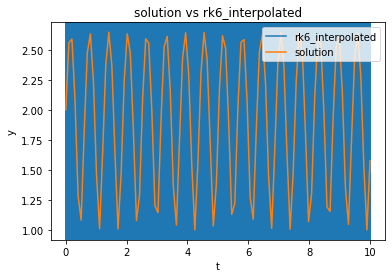

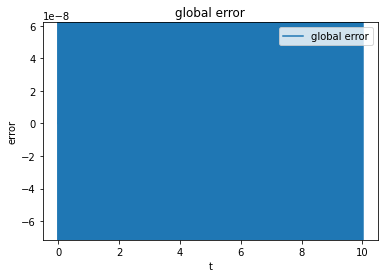

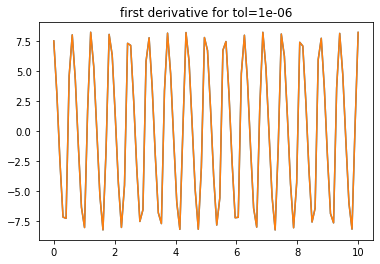

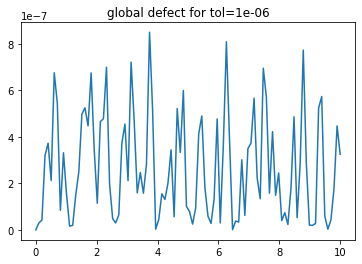

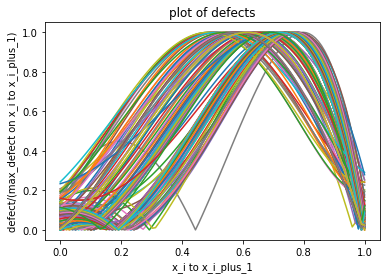

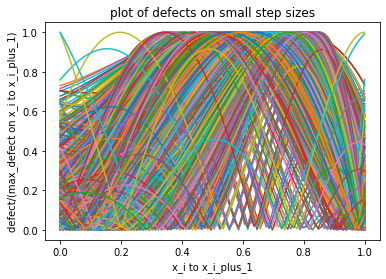

0.0
0.0
3.989257368886001e-09
7.843426352849292e-09
1.1522193421598104e-08
1.499083834843873e-08
1.8220258191092853e-08
2.1186472576317783e-08
2.3869965115608238e-08
2.6255011942311057e-08
2.832908307937032e-08
3.0082329072200764e-08
3.15071670975442e-08
3.2597959442881574e-08
3.3350765260564685e-08
3.3763168705291946e-08
3.3834168355895144e-08
3.356412037192058e-08
3.2954740714075115e-08
3.200915932310977e-08
3.0732031142122196e-08
2.9129713752240605e-08
2.7210515174402872e-08
2.498502693626392e-08
2.246655883553217e-08
1.967168161698396e-08
1.6620900211705703e-08
1.3339442439530558e-08
9.858148519725773e-09
6.2143614698584315e-09
2.452624769944123e-09
1.3752243788189844e-09
5.211394649151657e-09
8.996410283401701e-09
1.2679071792476293e-08
1.6236866517971293e-08
1.971470520167884e-08
2.3293912798649785e-08
2.7406823477349462e-08
3.2909158509397685e-08
3.40417642963331e-08
3.5267764930679846e-08
3.660318603770918e-08
3.8065380625340595e-08
3.967151385175782e-08
4.143593979044624e-08
4

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


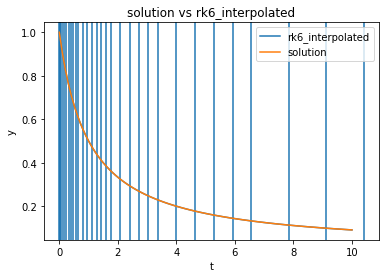

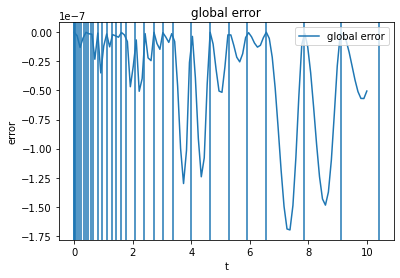

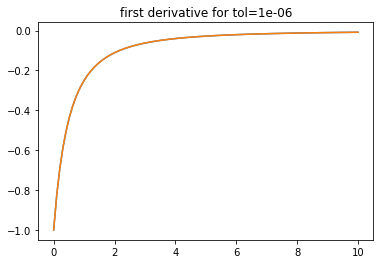

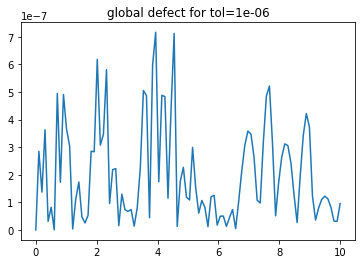

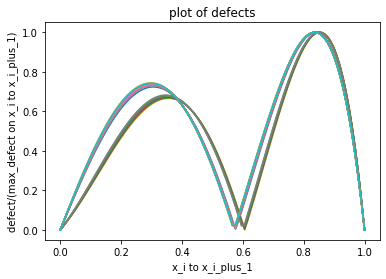

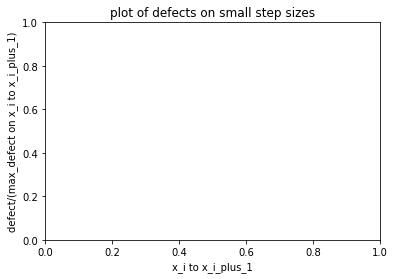

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-17
6.938893903907228e-17
5.551115123125783e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000056, 0.9999999999999944]
n_steps 73
n_successful_steps 62

integration complete


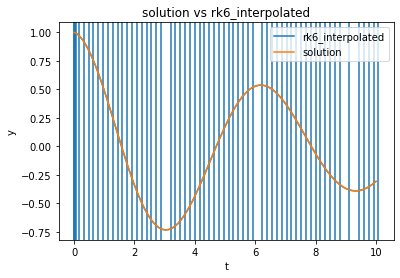

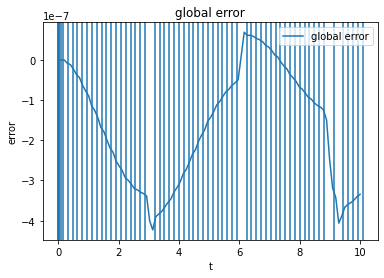

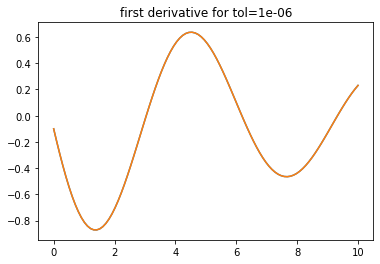

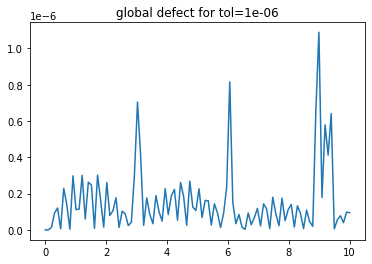

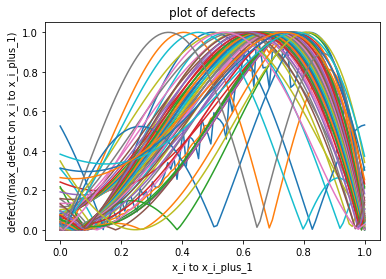

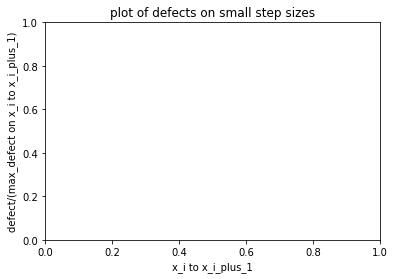

0.0
0.0
1.2212453270876722e-15
5.6066262743570405e-14
2.8617108682738035e-12
1.5854584312080533e-10
9.196520101006911e-09
2.3155815598308038e-08
4.144065113287354e-08
6.336554525532279e-08
8.81755253256955e-08
1.1506746488976205e-07
1.432119721700431e-07
1.7177525592215748e-07
1.999404154601203e-07
2.2692763118614678e-07
2.52012778256816e-07
2.745440397800003e-07
2.939561612458341e-07
3.0978205922682633e-07
3.216615702683612e-07
3.293472110588169e-07
3.3270689570041867e-07
3.902945636680144e-07
3.8000335311760836e-07
3.659793421650903e-07
3.4860742403886036e-07
3.283467890913272e-07
3.057169025155737e-07
2.8128239448754755e-07
2.556372782624994e-07
2.2938892110802023e-07
2.0314217995254236e-07
1.7748410178347607e-07
1.5296955771515464e-07
1.301081471727361e-07
1.0935266436806756e-07
9.108937049084886e-08
7.563026216406143e-08
6.3207469258586e-08
5.3969857582991665e-08
6.054621459750109e-08
5.8493508148238504e-08
5.3510857578320525e-08
4.5841013096570293e-08
3.578693230643637e-08
2.3702

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.5000000000000007, 0.9999999999999972]
n_steps 99
n_successful_steps 83

integration complete


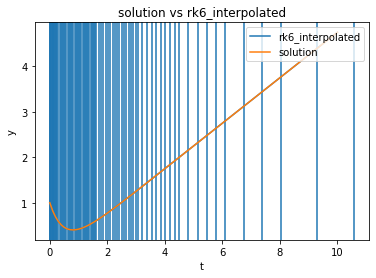

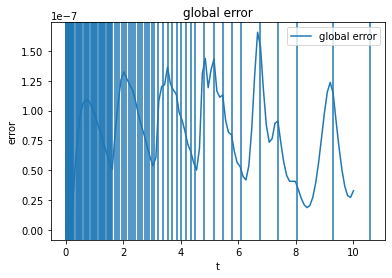

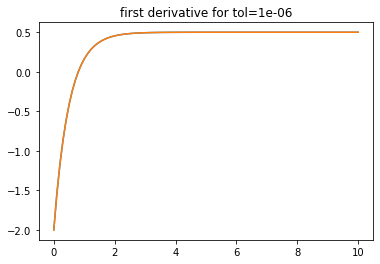

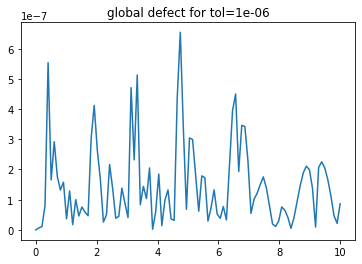

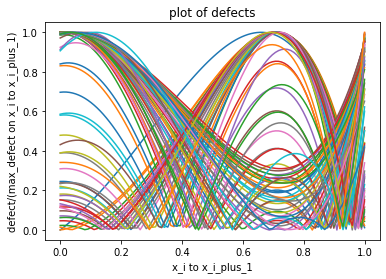

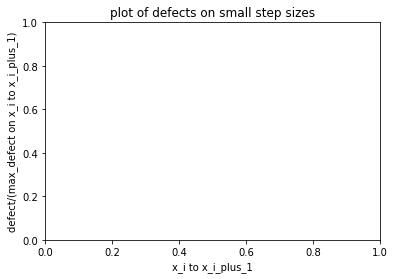

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
1.9863217737281502e-09
2.848214220030343e-09
3.639462287097217e-09
4.36428082561946e-09
5.0266627527051355e-09
5.630389821043025e-09
6.179043832155173e-09
6.6760149630695764e-09
7.1245130905950305e-09
2.8270073060276957e-08
4.612202397780152e-08
6.106182204312915e-08
7.343173624718702e-08
8.353862029908399e-08
9.165733433347256e-08
9.803385120354946e-08
1.0288807317238025e-07
1.0641638736874626e-07
1.0879398121277362e-07
1.1017694168113934e-07
1.1070415656400101e-07
1.1049903675397488e-07
1.0967107499926243e-07
1.0831725644200318e-07
1.0652333487515264e-07
1.0436498620869372e-07
1.019088515241684e-07
9.921347871033603e-08
9.633017322707715e-08
9.330376560257037e-08
9.017330371285937e-08
8.697267706025968e-08
8.373117921234297e-08
8.047401400812504e-08
7.722275130461753e-08
7.399573698219086e-08
7.08084608724846e-08
6.767388782691341e-08
6.460275392417003e-08
6.160383336784037e-08
5.868417574106388e-08
5.584931972446583e-08
5.31034842

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)